# Data Analysis Project - E-Commerce Public Dataset

# Problem Definition

- How did the company's sales and revenue perform over the past few months?
- Which product that sold the most and the least?
- Which seller sold the most?
- How's the demographics of our customers?
- When was the last time a customer made a transaction?
- How often did a customer make a purchase?
- How much money have customers spent?

# Import Library

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [91]:
customers_df = pd.read_csv('customers_dataset.csv')
geolocation_df = pd.read_csv('geolocation_dataset.csv')
order_items_df = pd.read_csv('order_items_dataset.csv')
order_payments_df = pd.read_csv('order_payments_dataset.csv')
order_reviews_df = pd.read_csv('order_reviews_dataset.csv')
orders_df = pd.read_csv('orders_dataset.csv')
product_category_name_df = pd.read_csv('product_category_name_translation.csv')
products_df = pd.read_csv('products_dataset.csv')
sellers_df = pd.read_csv('sellers_dataset.csv')

In [92]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [93]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [94]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [95]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [96]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [97]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [98]:
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [99]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [100]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# Data Assessing

### customers_df

In [101]:
# Show dataset general information
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [102]:
# Show duplicated data
print("Total duplicated data: ", customers_df.duplicated().sum())

# Show dataset statistical descriptive
customers_df.describe(include='all')

Total duplicated data:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### geolocation_df

In [103]:
# Show dataset general information
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [104]:
# Show duplicated data
print("Total duplicated data: ", geolocation_df.duplicated().sum())

# Show dataset statistical descriptive
geolocation_df.describe(include='all')

Total duplicated data:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


### order_items_df

In [105]:
# Show dataset general information
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [106]:
# Show duplicated data
print("Total duplicated data: ", order_items_df.duplicated().sum())

# Show dataset statistical descriptive
order_items_df.describe(include='all')

Total duplicated data:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


- We need to convert shipping_limit_date column to datetime

### order_payments_df

In [107]:
# Show dataset general information
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [108]:
# Show duplicated data
print("Total duplicated data: ", order_payments_df.duplicated().sum())

# Show dataset statistical descriptive
order_payments_df.describe(include='all')

Total duplicated data:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


### order_reviews_df

In [109]:
# Show dataset general information
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [110]:
# Show duplicated data
print("Total duplicated data: ", order_reviews_df.duplicated().sum())

# Show dataset statistical descriptive
order_reviews_df.describe(include='all')

Total duplicated data:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [111]:
# Show missing values
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### orders_df

In [112]:
# Show dataset general information
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [113]:
# Show duplicated data
print("Total duplicated data: ", orders_df.duplicated().sum())

# Show dataset statistical descriptive
orders_df.describe(include='all')

Total duplicated data:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [114]:
# Show missing values
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### product_category_name_df

In [115]:
# Show duplicated data
print("Total duplicated data: ", product_category_name_df.duplicated().sum())

# Show dataset statistical descriptive
product_category_name_df.describe(include='all')

Total duplicated data:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### products_df

In [116]:
# Show dataset general information
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [117]:
# Show missing values
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [118]:
# Show duplicated data
print("Total duplicated data: ", products_df.duplicated().sum())

# Show dataset statistical descriptive
products_df.describe(include='all')

Total duplicated data:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### sellers_df

In [119]:
# Show dataset general information
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [120]:
# Show duplicated data
print("Total duplicated data: ", sellers_df.duplicated().sum())

# Show dataset statistical descriptive
sellers_df.describe(include='all')

Total duplicated data:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


# Data Cleaning

### order_items_df

In [121]:
# Convert shipping_limit_date column to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

### order_reviews_df

We will drop review_comment_title and review_comment_message because it have a lot of missing values and it is not important for this analysis.

In [122]:
order_reviews_df.drop(columns=['review_comment_title','review_comment_message'], inplace=True)

In [123]:
# Convert date columns to datetime type
columns = ['review_creation_date', 'review_answer_timestamp']

for column in columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])


### orders_df

All missing values in orders_df are dates, so to fill this missing values first there are several steps that we will do:
- Convert all date columns type to datetime
- Create new features for show the time different from all the steps of delivery (purchase - approved - delivered carrier - delivered customer - estimated delivered)
- Fill missing values with tha average time of delivery for each column

In [124]:
# Convert date column to datatype
columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [125]:
# Create new features
orders_df['approved_time'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
orders_df['to_carrier_time'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
orders_df['carrier_to_customer_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']
orders_df['different_with_estimated'] = orders_df['order_estimated_delivery_date'] - orders_df['order_delivered_customer_date']

In [126]:
columns = ['approved_time', 'to_carrier_time', 'carrier_to_customer_time', 'different_with_estimated']

for column in columns:
    orders_df[column].fillna(orders_df[column].mean(skipna=True), inplace=True)

In [127]:
# Fill missing values
orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'] + orders_df['approved_time'], inplace=True)
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + orders_df['to_carrier_time'], inplace=True)
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'] + orders_df['carrier_to_customer_time'], inplace=True)

# Create total delivery time features
orders_df['total_delivery_time'] = orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']

In [128]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
approved_time                    0
to_carrier_time                  0
carrier_to_customer_time         0
different_with_estimated         0
total_delivery_time              0
dtype: int64

### products_df

Translate product category name using product_category_name_df

In [129]:
products_df = pd.merge(
    left=products_df,
    right=product_category_name_df,
    left_on='product_category_name',
    right_on='product_category_name',
    how='left'
)

products_df.drop(columns='product_category_name', inplace=True)
products_df.rename(columns={'product_category_name_english':'product_category_name'}, inplace=True)

In [130]:
products_df.isna().sum()

product_id                      0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category_name         623
dtype: int64

In [131]:
products_df.loc[products_df['product_category_name'].isna()]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [132]:
# Fill product_category_name missing values with "unknown"
products_df['product_category_name'].fillna("unknown", inplace=True)

# Fill numerical missing values with mean
columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for column in columns:
    products_df[column].fillna(products_df[column].mean(skipna=True), inplace=True)

# Exploratory Data Analysis

### customers_df

In [133]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Based on the statistical summary, we can conclude some information:
- Total customers is 99441.
- Our customers are come from 4119 cities and 27 states.

In [134]:
# Customers demographics by state
customers_df.groupby('customer_state').customer_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: customer_id, dtype: int64

We can see that most customers are come from Sao Paulo (SP), Rio de Janiero (RJ), and Minas Gerais(MG)

In [135]:
# Customers demographics by city
customers_df.groupby('customer_city').customer_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

### order_items_df

In [136]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Based on the statistical summary, we can conclude some information:
- Total order was 98666 were given to 3095 sellers.
- The average price is 120.65, while the minimum price is 0.85 and the maximum price is 6735.

### order_items_df and products_df

We will merge order_items_df and products_df to get the name of products ordered

In [137]:
order_items_product_df = pd.merge(
    left= order_items_df,
    right= products_df,
    how='left',
    left_on= 'product_id',
    right_on= 'product_id'
)

In [138]:
#  Show the most sold products
order_items_product_df.groupby('product_category_name').order_id.count().sort_values(ascending=False).head()

product_category_name
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
Name: order_id, dtype: int64

In [139]:
#  Show the least sold products
order_items_product_df.groupby('product_category_name').order_id.count().sort_values(ascending=True).head()

product_category_name
security_and_services         2
fashion_childrens_clothes     8
la_cuisine                   14
cds_dvds_musicals            14
arts_and_craftmanship        24
Name: order_id, dtype: int64

In [140]:
# Show the sellers who sold the most products
order_items_product_df.groupby('seller_id').order_id.count().sort_values(ascending=False).head(5)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
Name: order_id, dtype: int64

In [141]:
#  Show products with the largest sales price result
order_items_product_df.groupby('product_category_name').price.sum().sort_values(ascending=False).head()

product_category_name
health_beauty            1258681.34
watches_gifts            1205005.68
bed_bath_table           1036988.68
sports_leisure            988048.97
computers_accessories     911954.32
Name: price, dtype: float64

In [142]:
#  Show sellers with the largest sales price result
order_items_product_df.groupby('seller_id').price.sum().sort_values(ascending=False).head()

seller_id
4869f7a5dfa277a7dca6462dcf3b52b2    229472.63
53243585a1d6dc2643021fd1853d8905    222776.05
4a3ca9315b744ce9f8e9374361493884    200472.92
fa1c13f2614d7b5c4749cbc52fecda94    194042.03
7c67e1448b00f6e969d365cea6b010ab    187923.89
Name: price, dtype: float64

### order_payments_df

In [143]:
# Show total payments based on payment type
order_payments_df.groupby('payment_type').agg({'order_id':'nunique', 'payment_value':'sum'}).sort_values(by='order_id', ascending=False)

,order_id,payment_value
payment_type,,
credit_card,76505,12542084.19
boleto,19784,2869361.27
voucher,3866,379436.87
debit_card,1528,217989.79
not_defined,3,0.00


### order_df

In [144]:
orders_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,to_carrier_time,carrier_to_customer_time,different_with_estimated,total_delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441,99441
mean,2017-12-31 08:43:12.776581120,2017-12-31 19:08:21.516067840,2018-01-03 14:27:55.136209408,2018-01-12 22:24:29.411491072,2018-01-24 03:08:37.730111232,0 days 10:25:08.739486910,2 days 19:19:15.298850927,9 days 07:55:59.254148743,11 days 04:17:55.957616402,12 days 13:41:16.634909830
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-07 05:45:55.298850927,2016-10-11 13:46:32,2016-09-30 00:00:00,0 days 00:00:00,-172 days +18:44:38,-17 days +21:41:31,-189 days +00:35:53,0 days 12:48:07
25%,2017-09-12 14:46:19,2017-09-12 21:55:13,2017-09-14 20:43:36,2017-09-22 20:25:49,2017-10-03 00:00:00,0 days 00:12:55,0 days 21:17:22,4 days 04:06:33,6 days 16:45:56,6 days 20:58:16
50%,2018-01-18 23:04:36,2018-01-19 11:54:30,2018-01-23 17:18:57,2018-02-01 14:58:56,2018-02-15 00:00:00,0 days 00:20:39,1 days 20:40:53,7 days 04:40:29,11 days 07:54:44,10 days 10:29:35
75%,2018-05-04 15:42:16,2018-05-04 23:50:21,2018-05-08 09:55:00,2018-05-15 16:52:14,2018-05-25 00:00:00,0 days 14:32:16,3 days 12:35:43,11 days 21:18:07,16 days 03:47:02,15 days 10:35:58
max,2018-10-17 17:30:18,2018-10-18 03:55:26.739486910,2018-10-20 23:14:42.038337837,2018-10-30 07:10:41.292486580,2018-11-12 00:00:00,187 days 21:10:50,125 days 18:18:06,205 days 04:35:00,146 days 00:23:13,209 days 15:05:12
std,NaN,NaN,NaN,NaN,NaN,1 days 02:01:01.370983028,3 days 12:24:46.912325664,8 days 15:05:01.413500392,10 days 00:47:40.227062756,9 days 10:33:55.161361032


Based on the statistical summary, we can get some information:
- The average approve time is 10 hours.
- The average delivery time to carrier is 2 days.
- The average delivery time from carrier to customer is 9 days.
- The average total delivery time is 12 days.
- The average different delivery time with estimated time is 11 days.

In [145]:
orders_df.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

### sellers_df

In [146]:
# Show location of sellers based on their city
sellers_df.groupby('seller_city').seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [147]:
# Show location of sellers based on their state
sellers_df.groupby('seller_state').seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Get only necessary columns from all data frame for this analysis 

In [148]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [149]:
customers_df = customers_df[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']]

In [150]:
order_items_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [151]:
order_items_product_df = order_items_product_df[['order_id', 'seller_id', 'product_category_name', 'price', 'freight_value']]

In [152]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [153]:
order_payments_df = order_payments_df[['order_id', 'payment_type', 'payment_value']]

In [154]:
order_reviews_df.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53


In [155]:
order_reviews_df = order_reviews_df[['order_id', 'review_score']]

In [156]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,approved_time,to_carrier_time,carrier_to_customer_time,different_with_estimated,total_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0 days 00:10:42,2 days 08:47:45,6 days 01:30:13,7 days 02:34:47,8 days 10:28:40
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,0 days 11:06:33,12 days 00:56:45,5 days 08:32:15,13 days 18:46:08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0 days 00:16:34,0 days 04:54:37,9 days 04:16:29,17 days 05:53:31,9 days 09:27:40
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0 days 00:17:53,3 days 17:54:00,9 days 10:48:43,12 days 23:31:18,13 days 05:00:36
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0 days 01:01:50,0 days 21:26:05,1 days 22:30:28,9 days 05:42:58,2 days 20:58:23


In [157]:
orders_df = orders_df[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'total_delivery_time']]

### Merge data frame and create new data frame named all_df contains all necessary data for this analysis

In [158]:
all_df = pd.merge(
    left= orders_df,
    right= order_items_product_df,
    how='left',
    left_on='order_id',
    right_on= 'order_id'
)

In [159]:
all_df = pd.merge(
    left= all_df,
    right= order_payments_df,
    how = 'left',
    left_on= 'order_id',
    right_on= 'order_id'
)

In [160]:
all_df = pd.merge(
    left= all_df,
    right= order_reviews_df,
    how = 'left',
    left_on= 'order_id',
    right_on= 'order_id'
)

In [161]:
all_df = pd.merge(
    left= all_df,
    right= customers_df,
    how = 'left',
    left_on= 'customer_id',
    right_on= 'customer_id'
)

In [162]:
all_df = pd.merge(
    left= all_df,
    right= sellers_df,
    how = 'left',
    left_on= 'seller_id',
    right_on= 'seller_id'
)

In [163]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,total_delivery_time,seller_id,product_category_name,price,freight_value,payment_type,payment_value,review_score,customer_unique_id,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8 days 10:28:40,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,29.99,8.72,credit_card,18.12,4.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8 days 10:28:40,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,29.99,8.72,voucher,2.00,4.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,8 days 10:28:40,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,29.99,8.72,voucher,18.59,4.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,13 days 18:46:08,289cdb325fb7e7f891c38608bf9e0962,perfumery,118.70,22.76,boleto,141.46,4.0,af07308b275d755c9edb36a90c618231,barreiras,BA,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,9 days 09:27:40,4869f7a5dfa277a7dca6462dcf3b52b2,auto,159.90,19.22,credit_card,179.12,5.0,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,14840.0,guariba,SP


# Explanatory Data Analysis

### 1. How did the company's sales and revenue perform over the past few months?

From two graph below we can see that:
- The sales mostly have positive trend from 2016-12 to 2018-05.
- The highest sales as well as the highest sales increase is in 2017-11, but in the following month it decreased drastically again.
- We have very litle order data in 2018-09 and 2018-10, we assume that when the data is recorded this data is no completed yet.

In [164]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "count",
    "payment_value": "sum"
})

monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_purchase_timestamp" : "order_date",
    "order_id": "order_count",
    "payment_value": "total_revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,total_revenue
0,2016-09,7,388.47
1,2016-10,401,76559.05
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,1035,190806.27


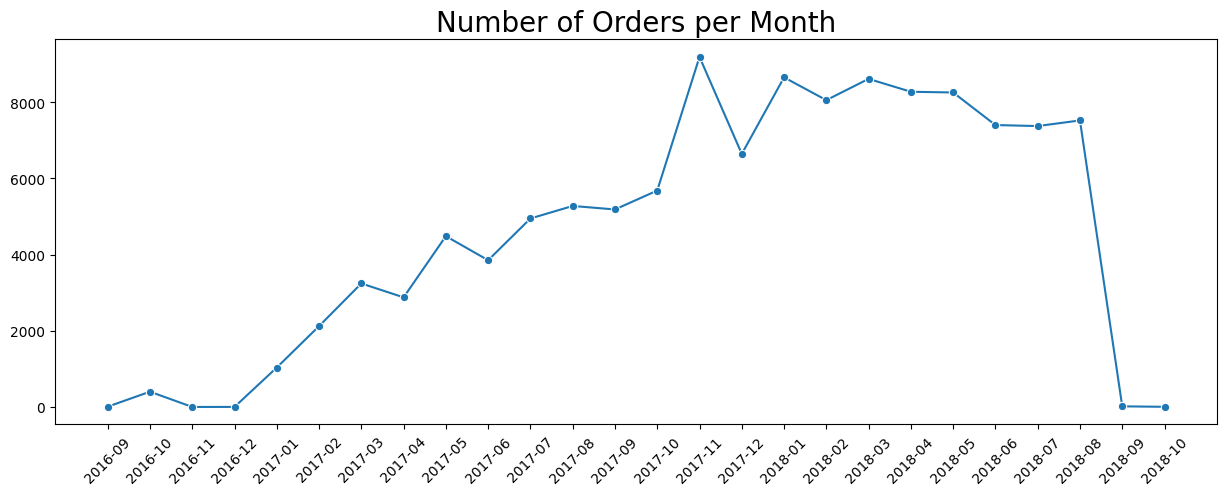

In [165]:
plt.figure(figsize=(15, 5)) 
sns.lineplot(x=monthly_orders_df["order_date"], y=monthly_orders_df["order_count"], marker='o')
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

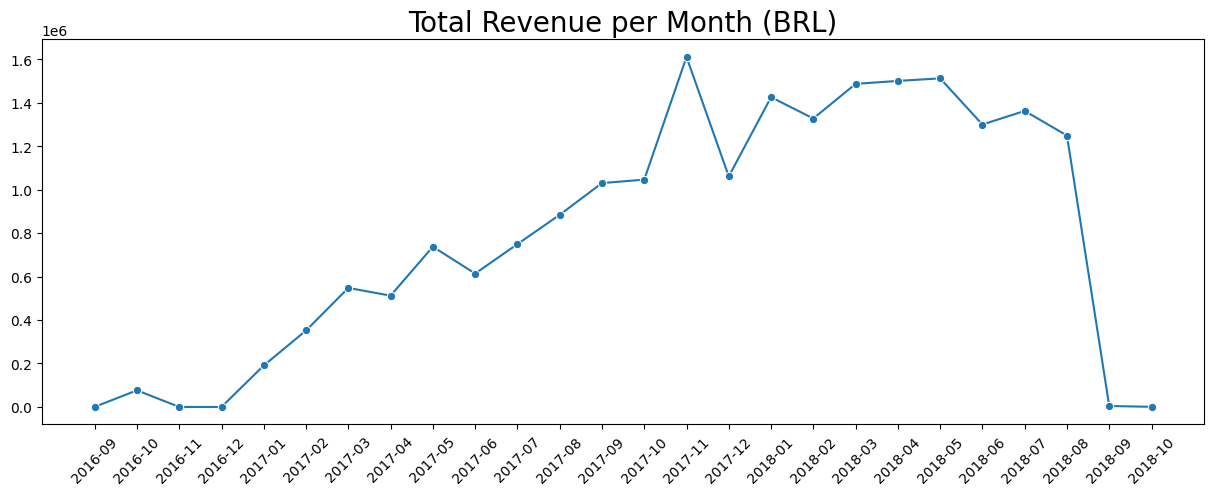

In [166]:
plt.figure(figsize=(15, 5)) 
sns.lineplot(x=monthly_orders_df["order_date"], y=monthly_orders_df["total_revenue"], marker='o') 
plt.title("Total Revenue per Month (BRL)", loc="center", fontsize=20) 
plt.xticks(rotation=45)
plt.ylabel(None)
plt.xlabel(None)
plt.show()

### 2. Which product category that sold the most and the least?

From two graph below we can see that:
- bed_bath_table and health_beauty category are our best performing products both based on number of sales or revenue.
- security_and_services, fashion_childrens_clothes, and ads_dvds_musicals are our worst performing products.

In [167]:
sum_order_items_df = all_df.groupby("product_category_name").agg({'order_id':'count','payment_value':'sum'}).sort_values(by='order_id', ascending=False).reset_index()
sum_order_items_df.head()

,product_category_name,order_id,payment_value
0,bed_bath_table,11988,1743998.80
1,health_beauty,10032,1662963.59
2,sports_leisure,9004,1400223.07
3,furniture_decor,8832,1443963.61
4,computers_accessories,8150,1599481.06


Text(0.5, 0.98, 'Best and Worst Performing Product by Number of Sales')

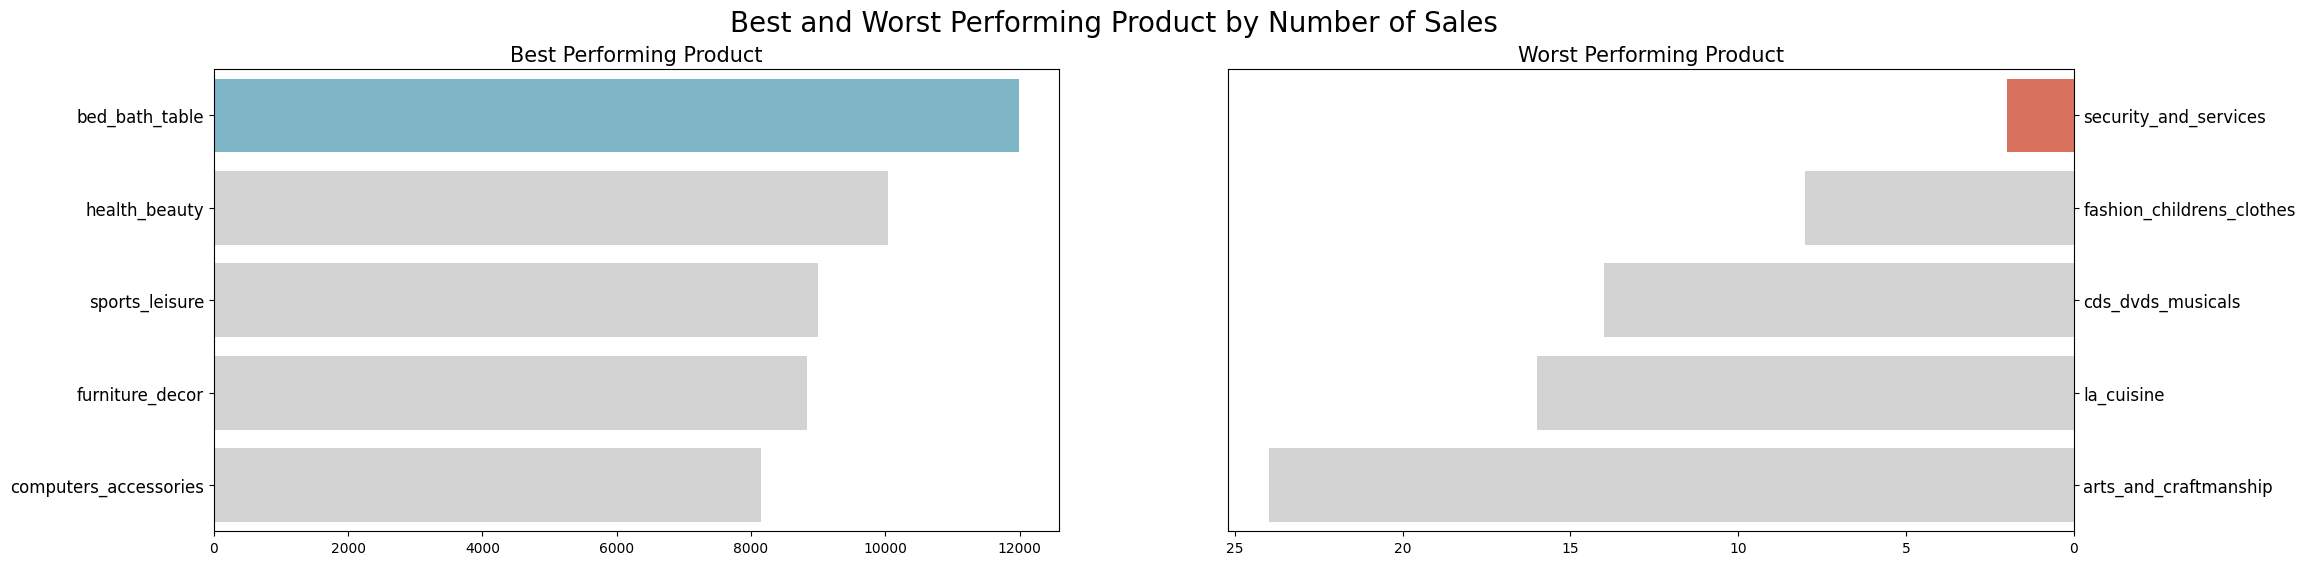

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#ec644b", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="order_id", y="product_category_name", data=sum_order_items_df.sort_values(by="order_id", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)

Text(0.5, 0.98, 'Best and Worst Performing Product by Revenue (BRL)')

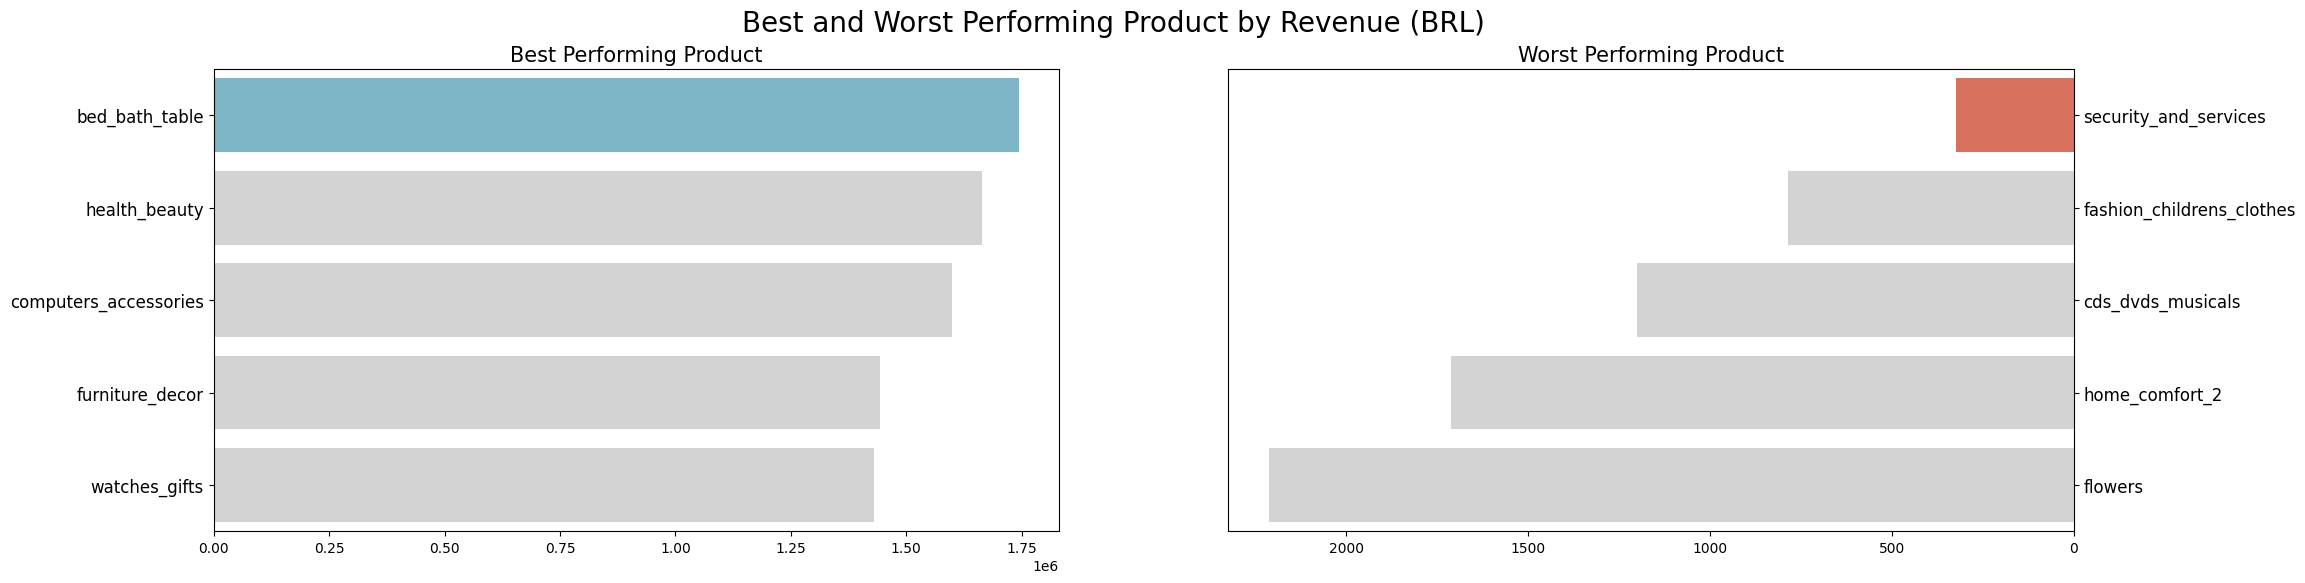

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
colors2 = ["#ec644b", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="payment_value", y="product_category_name", data=sum_order_items_df.sort_values(by="payment_value", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="payment_value", y="product_category_name", data=sum_order_items_df.sort_values(by="payment_value", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Revenue (BRL)", fontsize=20)

### 3. Which seller sold the most and get the most revenue?

From the graph below we can see that:
- seller with seller id (4a3ca9315b744ce9f8e9374361493884) is the best seller in our platform

In [170]:
sum_seller_df = all_df.groupby('seller_id').agg({'order_id':'count', 'payment_value':'sum'}).sort_values(by='order_id', ascending=False).reset_index()
sum_seller_df.head()

,seller_id,order_id,payment_value
0,4a3ca9315b744ce9f8e9374361493884,2155,306138.80
1,6560211a19b47992c3666cc44a7e94c0,2130,180028.11
2,1f50f920176fa81dab994f9023523100,2017,291918.98
3,cc419e0650a3c5ba77189a1882b7556a,1893,144535.03
4,da8622b14eb17ae2831f4ac5b9dab84a,1662,276578.63


Text(0.5, 0.98, 'Best Seller by Total Product Sold and Total Revenue')

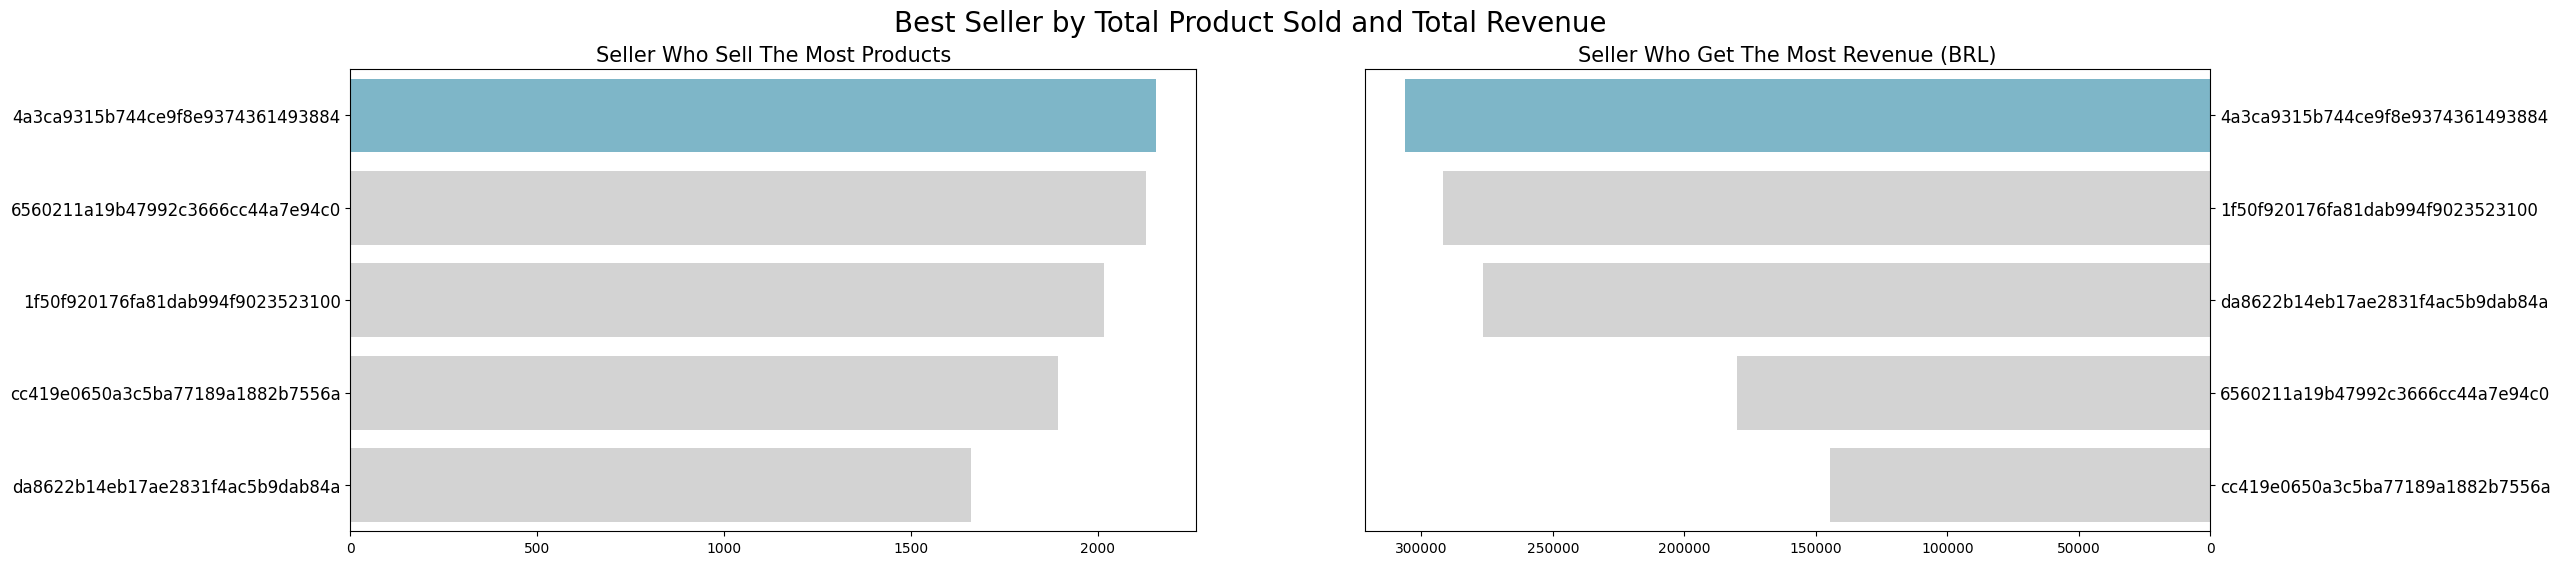

In [171]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_id", y="seller_id", data=sum_seller_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Seller Who Sell The Most Products", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="payment_value", y="seller_id", data=sum_seller_df.head(5).sort_values(by='payment_value', ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Seller Who Get The Most Revenue (BRL)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best Seller by Total Product Sold and Total Revenue", fontsize=20)

### 4. How's the demographics of our customers and sellers?

From the graph below we can see that:
- Sao Paulo (SP) is really dominating our sales, they have most customer, most seller, and most product sold in this state.
- Below that, there are states like Rio de Janiera (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), and Parana (PR) with the number that is quite far compared to Sao Paulo.

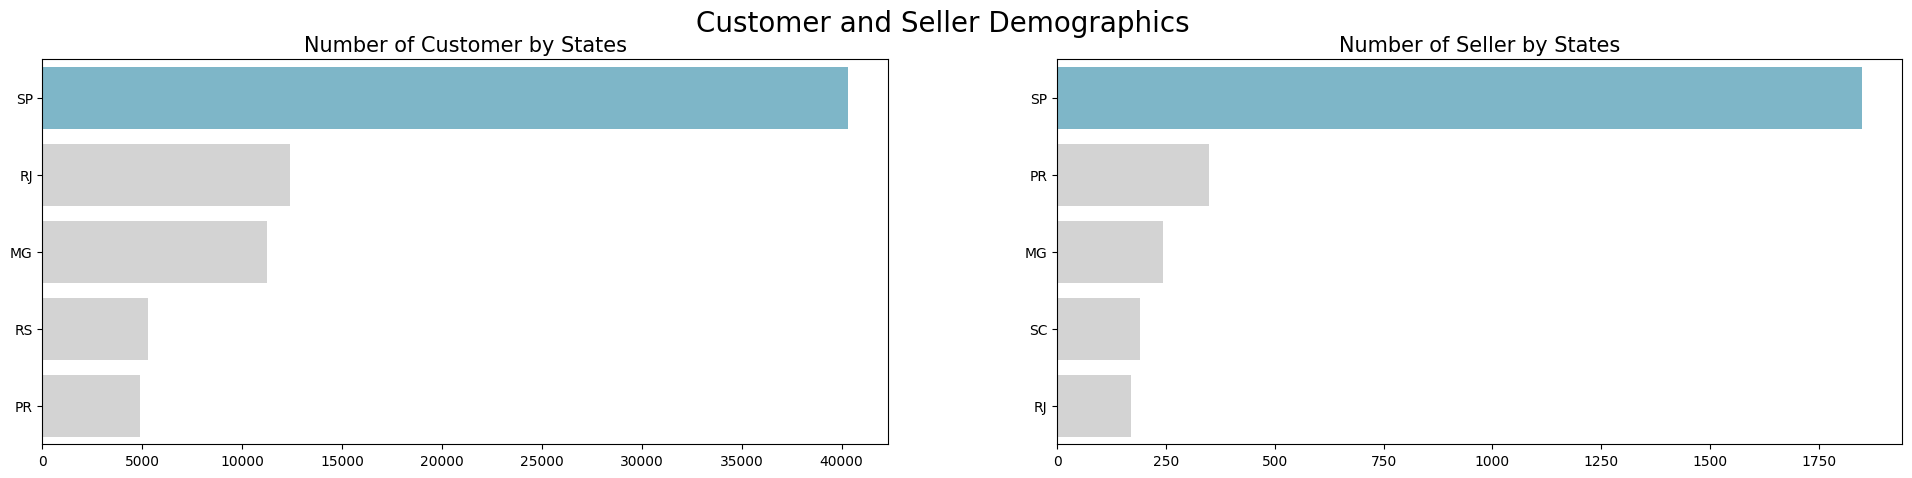

In [174]:
customer_state_df = all_df.groupby(by="customer_state").customer_unique_id.nunique().reset_index()
customer_state_df.rename(columns={"customer_unique_id": "customer_count"}, inplace=True)

seller_state_df = all_df.groupby(by="seller_state").seller_id.nunique().reset_index()
seller_state_df.rename(columns={"seller_id": "seller_count"}, inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", data=customer_state_df.sort_values(by="customer_count", ascending=False).head(5), palette=colors_, ax=ax[0])
ax[0].set_title("Number of Customer by States", loc="center", fontsize=15)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)

sns.barplot(x="seller_count", y="seller_state", data=seller_state_df.sort_values(by="seller_count", ascending=False).head(5), palette=colors_, ax=ax[1])
ax[1].set_title("Number of Seller by States", loc="center", fontsize=15)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)

plt.suptitle("Customer and Seller Demographics", fontsize=20)

plt.show()

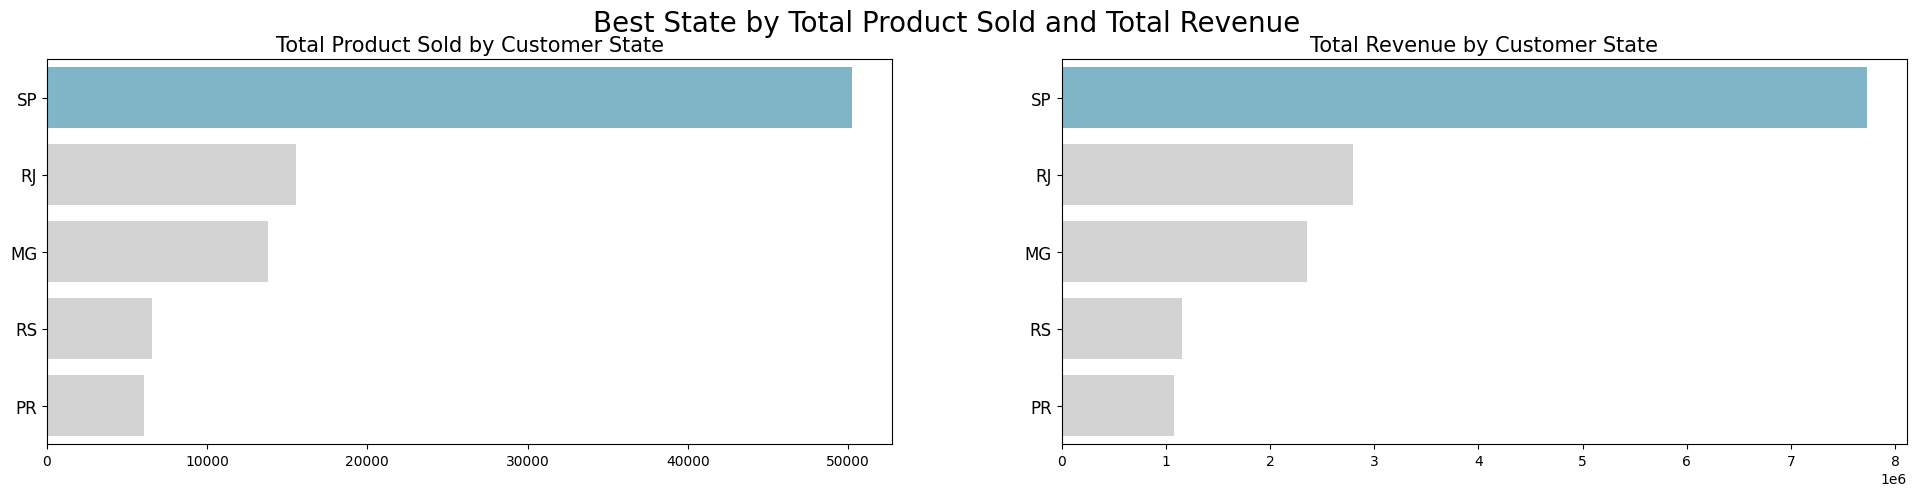

In [175]:
state_df = all_df.groupby('customer_state').agg({'order_id':'count', 'payment_value':'sum'}).sort_values(by='order_id', ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 5))
 
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="order_id", y="customer_state", data=state_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Total Product Sold by Customer State", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(x="payment_value", y="customer_state", data=state_df.head(5).sort_values(by='payment_value', ascending=False), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Total Revenue by Customer State", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best State by Total Product Sold and Total Revenue", fontsize=20)

plt.show()

### RFM Analysis

5. When was the last time a customer made a transaction?
6. How often did a customer make a purchase?
7. How much money have customers spent?

RFM Analysis will answer our three last questions. 

- Recency show how many days has it been since the customer's last order.
- Frequency show how many time the customer have made orders.
- Monetary  show how much money the customer spent in our platform.

In [178]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # get the last order
    "order_id": "nunique", # count total order
    "payment_value": "sum" # count total revenue generated
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


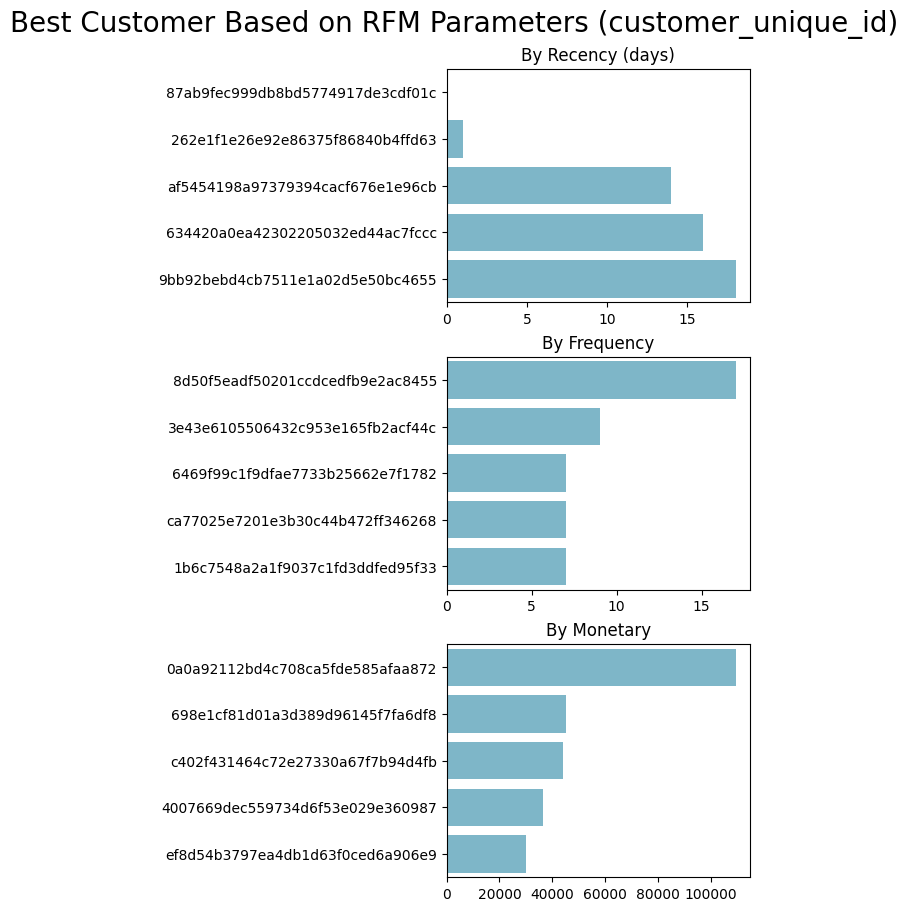

In [179]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,9), constrained_layout=True)
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(x="recency", y="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)")
 
sns.barplot(x="frequency", y="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency")
 
sns.barplot(x="monetary", y="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary")
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_unique_id)", fontsize=20)
plt.show()

In [182]:
all_df.to_csv("all.csv")